In [14]:
import numpy as np
import pandas as pd

df_train = pd.read_csv("titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [22]:
df_train.shape

(891, 12)

In [21]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_male         uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [15]:
for c in df_train.columns:
    print(c,np.sum(df_train[c].isnull()))

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [13]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [17]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [18]:
df_train.drop(['Cabin'], axis=1, inplace=True)

In [19]:
#in label encoding it is required that a column has data with some kind of order or hierarchy when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.

df_train = pd.get_dummies(df_train, columns=['Sex','Embarked'], drop_first=True)

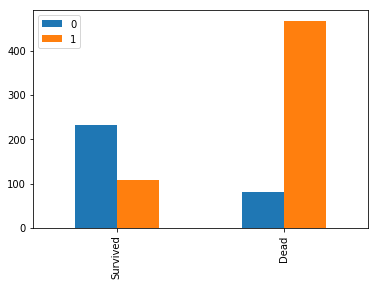

In [29]:
import matplotlib.pyplot as plt

survived_sex = df_train[df_train['Survived']==1]['Sex_male'].value_counts()
dead_sex = df_train[df_train['Survived']==0]['Sex_male'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot.bar()

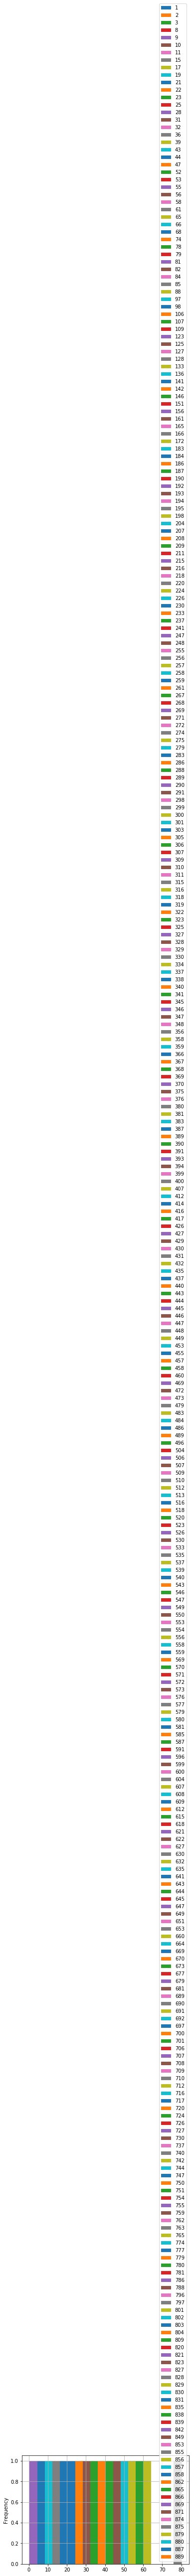

In [33]:
survived_age = df_train[df_train['Survived']==1]['Age']
df1 = pd.DataFrame([survived_age])
df1.plot.hist(grid=True,bins=20)